# Load data

In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

%matplotlib inline
pd.set_option('display.max_columns', None)

In [5]:
def import_data(data_path):
    '''
    return dataframe for the csv found at data_path
    input:
        data_path: a path to the csv
    output:
        df: processed pandas dataframe of input csv file
    '''
    data_path = 'survey_results_public.csv'
    df = pd.read_csv('survey_results_public.csv')
    return df

In [6]:
#Load dataset
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

In [8]:
df.shape

(51392, 154)

In [9]:
df.describe()

,Respondent,CareerSatisfaction,JobSatisfaction,HoursPerWeek,StackOverflowSatisfaction,Salary,ExpectedSalary
count,51392.000000,42695.000000,40376.000000,20600.000000,36592.000000,12891.000000,2566.000000
mean,25696.500000,7.300574,6.957078,3.952282,8.429875,56298.480641,33142.220468
std,14835.736854,1.955444,2.167652,7.564722,1.390635,39880.905277,30162.988829
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12848.750000,6.000000,6.000000,1.000000,8.000000,26440.371839,4490.492484
50%,25696.500000,8.000000,7.000000,1.000000,9.000000,50000.000000,29364.263691
75%,38544.250000,9.000000,8.000000,4.000000,10.000000,80000.000000,50403.225806
max,51392.000000,10.000000,10.000000,40.000000,10.000000,197000.000000,187500.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51392 entries, 0 to 51391
Columns: 154 entries, Respondent to ExpectedSalary
dtypes: float64(6), int64(1), object(147)
memory usage: 60.4+ MB


# Clean and transform data

In [14]:
# select our variables of interest
columns = ['Respondent','Country', 'YearsCodedJob', 'FormalEducation', 'CareerSatisfaction', 'Salary']
# apply filters
data = df[df['Professional']=='Professional developer']
data = data[data['EmploymentStatus']=='Employed full-time']
data = data[columns]
data.head(10)

,Respondent,Country,YearsCodedJob,FormalEducation,CareerSatisfaction,Salary
2,3,United Kingdom,20 or more years,Bachelor's degree,8.0,113750.0
4,5,Switzerland,10 to 11 years,Master's degree,6.0,NaN
7,8,Poland,7 to 8 years,Master's degree,7.0,NaN
8,9,Colombia,7 to 8 years,Bachelor's degree,6.0,NaN
11,12,Canada,8 to 9 years,Bachelor's degree,8.0,NaN
13,14,Germany,15 to 16 years,Some college/university study without earning ...,8.0,NaN
14,15,United Kingdom,20 or more years,Professional degree,8.0,100000.0
17,18,United States,20 or more years,Bachelor's degree,9.0,130000.0
18,19,United States,3 to 4 years,Bachelor's degree,5.0,82500.0
19,20,Greece,12 to 13 years,Doctoral degree,8.0,NaN


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30211 entries, 2 to 51390
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Respondent          30211 non-null  int64  
 1   Country             30211 non-null  object 
 2   YearsCodedJob       29978 non-null  object 
 3   FormalEducation     30211 non-null  object 
 4   CareerSatisfaction  29935 non-null  float64
 5   Salary              12444 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.6+ MB


In [58]:
data.describe()

,Respondent,CareerSatisfaction,Salary
count,30211.000000,29935.000000,12444.000000
mean,25278.272682,7.429230,57353.913736
std,14989.397842,1.811467,39882.230088
min,3.000000,0.000000,0.000000
25%,12221.500000,7.000000,27956.989247
50%,25039.000000,8.000000,51254.032258
75%,38470.500000,9.000000,80500.000000
max,51391.000000,10.000000,197000.000000


In [15]:
# Add new column to indicate comes from North America or Europe
Europe = ['Liechtenstein', 'Switzerland','Iceland', 'Norway','Denmark','Ireland', 'United Kingdom', 'Germany',
          'Netherlands', 'Sweden', 'Luxembourg', 'Austria','Finland', 'France', 'Belgium', 'Spain', 'Italy','Poland']

North_America = ['United States', 'Canada']
    
data['Location'] = data['Country'].apply(lambda x: 'Europe' if x in Europe 
                                         else ('North_America' if x in North_America else 'Other'))
data.head(10)

,Respondent,Country,YearsCodedJob,FormalEducation,CareerSatisfaction,Salary,Location
2,3,United Kingdom,20 or more years,Bachelor's degree,8.0,113750.0,Europe
4,5,Switzerland,10 to 11 years,Master's degree,6.0,NaN,Europe
7,8,Poland,7 to 8 years,Master's degree,7.0,NaN,Europe
8,9,Colombia,7 to 8 years,Bachelor's degree,6.0,NaN,Other
11,12,Canada,8 to 9 years,Bachelor's degree,8.0,NaN,North_America
13,14,Germany,15 to 16 years,Some college/university study without earning ...,8.0,NaN,Europe
14,15,United Kingdom,20 or more years,Professional degree,8.0,100000.0,Europe
17,18,United States,20 or more years,Bachelor's degree,9.0,130000.0,North_America
18,19,United States,3 to 4 years,Bachelor's degree,5.0,82500.0,North_America
19,20,Greece,12 to 13 years,Doctoral degree,8.0,NaN,Other


In [16]:
#create the location value and filter out any respondant that is not in those countries of interest
data = data[data['Location'].isin(["Europe","North_America"])]

In [17]:
#check data
data.Location.unique()

array(['Europe', 'North_America'], dtype=object)

In [61]:
# tranform the number of years in a job to numeric in order to be easier to read and also easier to plot
years = {'Less than a year' : 0,
            '1 to 2 years' : 1, 
            '2 to 3 years' : 2,
            '3 to 4 years' : 3, 
            '4 to 5 years' : 4, 
            '5 to 6 years' : 5, 
            '6 to 7 years' : 6, 
            '7 to 8 years' : 7, 
            '8 to 9 years' : 8, 
            '9 to 10 years' : 9, 
            '10 to 11 years' : 10, 
            '11 to 12 years' : 11, 
            '12 to 13 years' : 12,
            '13 to 14 years' : 13, 
            '14 to 15 years' : 14, 
            '15 to 16 years' : 15, 
            '16 to 17 years' : 16,
            '17 to 18 years' : 17, 
            '18 to 19 years' : 18, 
            '19 to 20 years' : 19, 
            '20 or more years' : 20,
            np.nan : -1}

data = data.reset_index()
data['YearsCodedJob'] = data['YearsCodedJob'].apply(lambda x: years[x])
data['YearsCodedJob'] = pd.to_numeric(data['YearsCodedJob'])

# remove the points with -1 since they were the placeholders for -1
data = data[data['YearsCodedJob'] != -1]

In [18]:
#check data
data.YearsCodedJob.unique()

array(['20 or more years', '10 to 11 years', '7 to 8 years',
       '8 to 9 years', '15 to 16 years', '3 to 4 years', '9 to 10 years',
       '16 to 17 years', 'Less than a year', '2 to 3 years',
       '5 to 6 years', '4 to 5 years', '1 to 2 years', '12 to 13 years',
       '14 to 15 years', '13 to 14 years', '18 to 19 years', nan,
       '17 to 18 years', '11 to 12 years', '6 to 7 years',
       '19 to 20 years'], dtype=object)

For missing values, since we are working with 2 target factors, Salary, and CareerSatisfaction, we might make 2 diverse datasets, one for each, and dispense with those cases that don't have the target variable, as we don't need to make synthetic information that will recolor the ponder

In [19]:
# create 2 datasets Salary and CareerSatisfaction which not null value
salary = data[data['Salary'].notnull()]
salary.drop('CareerSatisfaction', axis=1, inplace=True)

CareerSatisfaction = data[data['CareerSatisfaction'].notnull()]
CareerSatisfaction.drop('Salary', axis=1, inplace=True)

In [64]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8913 entries, 0 to 18891
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            8913 non-null   int64  
 1   Respondent       8913 non-null   int64  
 2   Country          8913 non-null   object 
 3   YearsCodedJob    8913 non-null   int64  
 4   FormalEducation  8913 non-null   object 
 5   Salary           8913 non-null   float64
 6   Location         8913 non-null   object 
dtypes: float64(1), int64(3), object(3)
memory usage: 557.1+ KB


In [65]:
CareerSatisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18612 entries, 0 to 18891
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               18612 non-null  int64  
 1   Respondent          18612 non-null  int64  
 2   Country             18612 non-null  object 
 3   YearsCodedJob       18612 non-null  int64  
 4   FormalEducation     18612 non-null  object 
 5   CareerSatisfaction  18612 non-null  float64
 6   Location            18612 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 1.1+ MB


## Analyze and Visualize

#### Question 1: Which location has the highest salary?

In [66]:
columns = ['Country', 'YearsCodedJob', 'FormalEducation','Salary', 'Location']
                                                                    
salary = salary[columns]

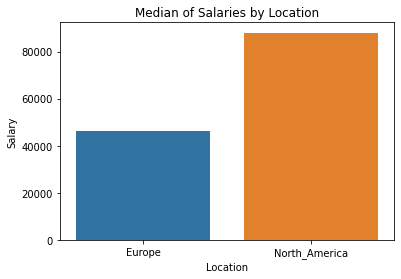

In [67]:
salary_plot = salary.groupby(['Location'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', data = salary_plot)
plt.title('Median of Salaries by Location');

According to the graph, North America has greater salaries than Europe, but if you have more education, that may change. We are interested in finding out how much formal education affects your wage in each continent because we are considering pursuing a master's degree in the near future.

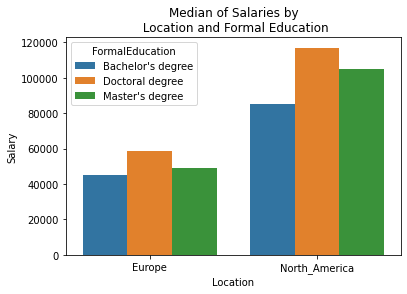

In [69]:
salary_academics = salary.copy()
# select our columns of interest
salary_academics = salary_academics[salary_academics['FormalEducation'].isin(["Bachelor's degree","Master's degree",
                                                                              'Doctoral degree'])]
          
salary_academics_plot = salary_academics.groupby(['Location','FormalEducation'])['Salary'].median().reset_index()

sns.barplot(x = 'Location', y = 'Salary', hue = 'FormalEducation', data = salary_academics_plot)
plt.title('Median of Salaries by\n Location and Formal Education');

As can be seen that with a bachelor's, master's or a PhD, you will have a better salary in North America in 2017.

### Question 2: Which location has the highest salary growth?


In [44]:
salary_years = salary.copy()

# select our columns of interest
columns = ['YearsCodedJob','Salary', 'Location']
salary_years = salary_years[columns]

# drop data that does not have a YearsCodedJob value, remember that -1 was a null value
salary_years = salary_years[salary_years['YearsCodedJob'] != -1]

In [45]:
salary_years = salary_years.groupby(['Location','YearsCodedJob'])['Salary'].median().reset_index()

# separate the continents
sy_Europe = salary_years[salary_years['Location'] == 'Europe']
sy_North = salary_years[salary_years['Location'] == 'North_America']

# We want the total change over time, si we calculate the cumulative change rate
sy_Europe['change'] = sy_Europe['Salary'].pct_change().cumsum()
sy_North['change'] = sy_North['Salary'].pct_change().cumsum() 

# join both data frames 
salary_years = pd.concat([sy_Europe,sy_North])

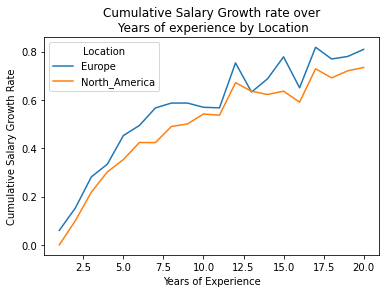

In [46]:
salary_years = salary_years[salary_years['YearsCodedJob'] != 0] 

ax = sns.lineplot(x="YearsCodedJob", y="change", hue="Location", data=salary_years)
plt.title('Cumulative Salary Growth rate over\n Years of experience by Location')
plt.ylabel('Cumulative Salary Growth Rate')
plt.xlabel('Years of Experience');

The overall rate of salary rise in both locations is rather comparable

### Question 3: Which location has the highest career satisfaction ?

In [48]:
columns = ['YearsCodedJob', 'CareerSatisfaction','Location']
CareerSatisfaction = CareerSatisfaction[columns]

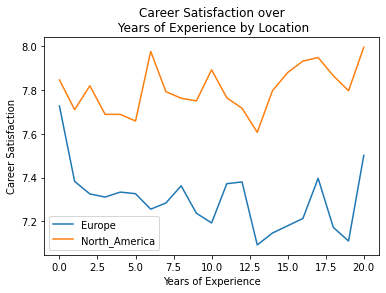

In [51]:
CareerSatisfaction = CareerSatisfaction.groupby(['Location','YearsCodedJob'])['CareerSatisfaction'].mean().reset_index()
sns.lineplot(x="YearsCodedJob", y="CareerSatisfaction", hue="Location", data=CareerSatisfaction)
plt.ylabel('Career Satisfaction')
plt.xlabel('Years of Experience')
plt.title('Career Satisfaction over\n Years of Experience by Location');
plt.legend(loc=3);

We can observe that both locations begin with job satisfaction levels that are very comparable, but North America has a consistent trend with an almost immediate gain in satisfaction whereas Europe exhibits a dip within the first year.